In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\janga\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv("hackathan.csv")

In [3]:
df

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108045,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


In [4]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108045,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [5]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [6]:
df.shape

(2227, 3)

## Treating Missing values

In [7]:
df.dropna(inplace=True, axis=0)

In [8]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

* Here we have 2227 rows in that we have less number of missing values are there ,so we can dropping the misiing values

In [9]:
df.describe()

,x1,x2,y
count,2219.000000,2.219000e+03,2219.000000
mean,-4.771837,8.967782e+04,0.442091
std,74.938264,2.986680e+06,0.496747
min,-134.369160,-1.348761e+02,0.000000
25%,-71.581453,-8.025966e+01,0.000000
50%,-9.750840,-1.566092e+00,0.000000
75%,59.963056,6.390448e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2219 non-null   float64
 1   x2      2219 non-null   float64
 2   y       2219 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 69.3 KB


In [11]:
df["x1"].unique()

array([-119.3666687 , -101.1080445 , -130.2786583 , ...,   85.67394043,
         78.95886223,  109.6240088 ])

### Bar plots
* This is one of the widely used plot, that we would have saw multiple times not just in data analysis, but wherever there is a trend analysis in many fields. Though it may seem simple it is powerful in analyzing data like sales figure every week, revenue from a product, Number of visitors to a site on each day of a week etc.


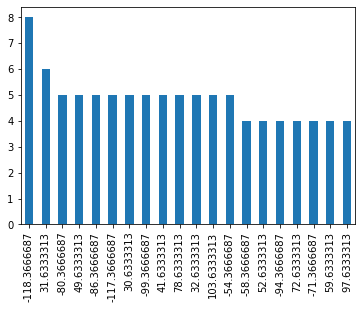

In [12]:
df.x1.value_counts().nlargest(20).plot(kind='bar')
plt.show()

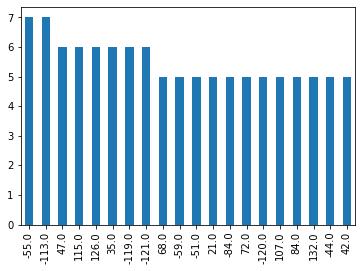

In [13]:
df.x2.value_counts().nlargest(20).plot(kind='bar')
plt.show()

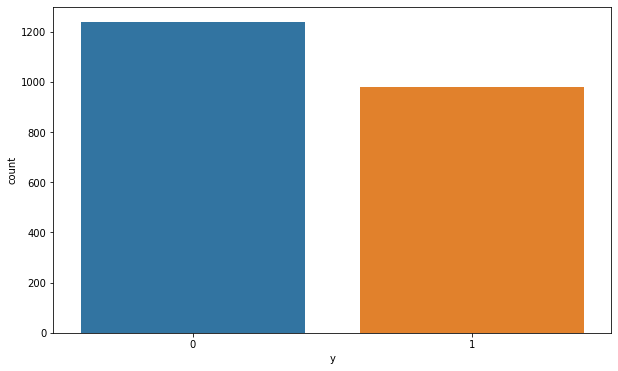

In [14]:
# Countplot,Univariate
plt.figure(figsize=(10,6))
sns.countplot(x=df['y'])
plt.show()

### Finding Outliers

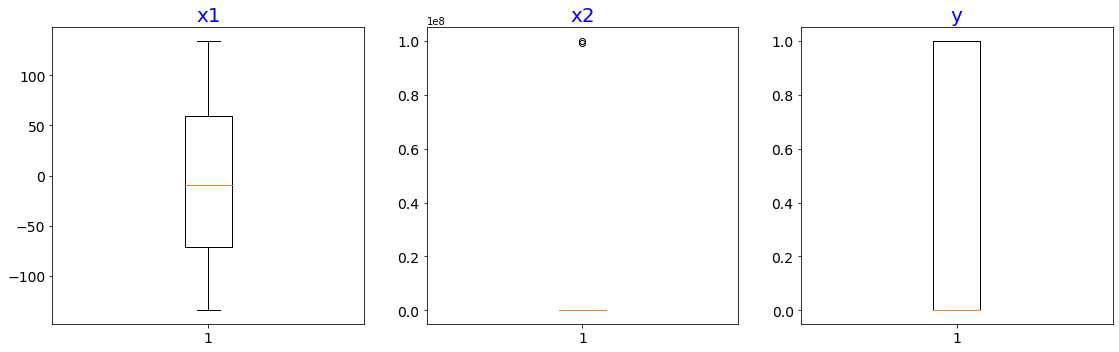

In [15]:
plt.figure(figsize=(19,12))


num_features = df.select_dtypes("number").columns
for i in range(3):
    plt.subplot(2,3,i+1)
    plt.boxplot(df[num_features[i]])
    plt.title(num_features[i],color="b",fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)

* Here we found Outliers in x2 column

In [16]:
from scipy.stats.mstats import winsorize

In [17]:
df["x2"] = winsorize(df["x2"],(0,0.001))

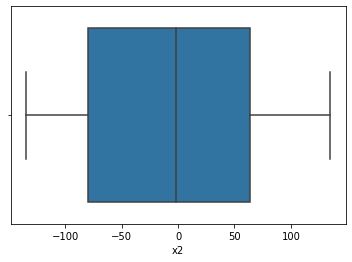

In [18]:
sns.boxplot(x="x2",data=df)

* I removed outliers in the x2

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

In [20]:
x = df.drop(['y'], axis=1)
y = df['y']

In [21]:
x.shape, y.shape

((2219, 2), (2219,))

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape,

((1775, 2), (444, 2), (1775,), (444,))

# Model Building

## Logistic Regression

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,precision_recall_fscore_support,classification_report

In [25]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [26]:
model.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_pred=model.predict(x_test)

In [28]:
y_train_pred=model.predict(x_train)

In [29]:
training_Score1 = accuracy_score(y_train,y_train_pred)
testing_score1 = accuracy_score(y_test,y_pred)
print(f'Accuracyt for training : {training_Score1} and testing : {testing_score1}')

Accuracyt for training : 0.7408450704225352 and testing : 0.7184684684684685


In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.99      0.79       241
           1       0.96      0.40      0.56       203

    accuracy                           0.72       444
   macro avg       0.81      0.69      0.68       444
weighted avg       0.80      0.72      0.69       444



## Support vector machine

### SVM with linear

In [31]:
from sklearn import svm
vector = svm.SVC(kernel='linear')
vector.fit(x_train, y_train)
y_pred=vector.predict(x_test)
y_train_pred=vector.predict(x_train)

In [32]:
training_Score2 = accuracy_score(y_train,y_train_pred)
testing_score2 = accuracy_score(y_test,y_pred)
print(f'Accuracyt for training : {training_Score2} and testing : {testing_score2}')

Accuracyt for training : 0.7335211267605634 and testing : 0.7207207207207207


In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      1.00      0.80       241
           1       1.00      0.39      0.56       203

    accuracy                           0.72       444
   macro avg       0.83      0.69      0.68       444
weighted avg       0.82      0.72      0.69       444



### SVM with RBF

In [34]:
from sklearn import svm
vector = svm.SVC(kernel='rbf')
vector.fit(x_train, y_train)
y_pred=vector.predict(x_test)
y_train_pred=vector.predict(x_train)

In [35]:
training_Score3 = accuracy_score(y_train,y_train_pred)
testing_score3 = accuracy_score(y_test,y_pred)
print(f'Accuracyt for training : {training_Score3} and testing : {testing_score3}')

Accuracyt for training : 0.9492957746478873 and testing : 0.9617117117117117


In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       241
           1       0.97      0.94      0.96       203

    accuracy                           0.96       444
   macro avg       0.96      0.96      0.96       444
weighted avg       0.96      0.96      0.96       444



## Decision tree

In [37]:
from sklearn.tree import DecisionTreeRegressor
tree= DecisionTreeRegressor(random_state = 0)
tree.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [38]:
y_pred=tree.predict(x_test)

In [39]:
y_train_pred=tree.predict(x_train)

In [40]:
training_Score4 = accuracy_score(y_train,y_train_pred)
testing_score4 = accuracy_score(y_test,y_pred)
print(f'Accuracyt for training : {training_Score4} and testing : {testing_score4}')

Accuracyt for training : 1.0 and testing : 0.9436936936936937


In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       241
           1       0.94      0.94      0.94       203

    accuracy                           0.94       444
   macro avg       0.94      0.94      0.94       444
weighted avg       0.94      0.94      0.94       444



## KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [43]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [44]:
y_pred=knn.predict(x_test)

In [45]:
y_train_pred=knn.predict(x_train)

In [46]:
training_Score5 = accuracy_score(y_train,y_train_pred)
testing_score5 = accuracy_score(y_test,y_pred)
print(f'Accuracyt for training : {training_Score5} and testing : {testing_score5}')

Accuracyt for training : 0.9594366197183098 and testing : 0.954954954954955


In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       241
           1       0.95      0.95      0.95       203

    accuracy                           0.95       444
   macro avg       0.95      0.95      0.95       444
weighted avg       0.95      0.95      0.95       444



## Finding Best algorithm

In [49]:
comp=[testing_score1,testing_score2,testing_score3,testing_score4,testing_score5]
label=['Logistic Regression','SVM Linear','SVM RBF Kernel','Decission Tree','K Nearest Neighbour']
sl=pd.Series(comp,label)

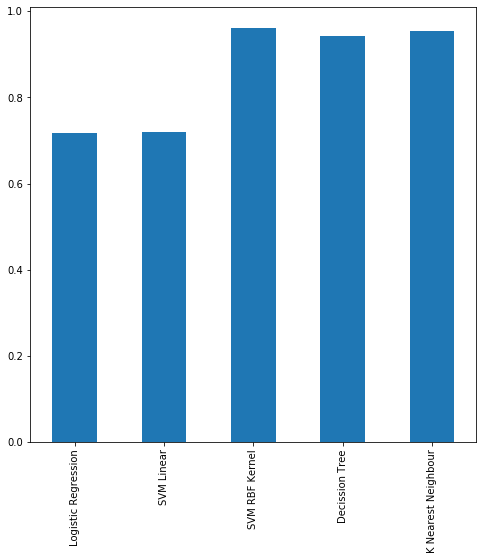

In [50]:
plt.figure(figsize=(8,8))
sl.plot.bar()

* Here I applied different types of machine learning algorithms.In that SVM RBF is the best model compare to other model,because of accuracy score is high compare to other model.

# Hyper Parameter Tunning

In [58]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [59]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
lr_model = LogisticRegression()
param = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=lr_model, param_grid=param, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.738031 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.733897 (0.025276) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.733897 (0.025276) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.733897 (0.025276) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.733897 (0.025276) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.733897 (0.025276) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.733897 (0.025276) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.733897 (0.025276) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.733897 (0.025276) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.733896 (0.025746) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.733897 (0.025276) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.733897 (0.025276) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.735962 (0.026636) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.733897 (0.025276) wi

In [66]:
lr_model = grid_result.best_estimator_
lr_model.fit(x_train,y_train)
y_pred = lr_model.predict(x_test)

In [69]:
y_train_pred=lr_model.predict(x_train)

In [70]:
training_Score = accuracy_score(y_train,y_train_pred)
testing_score = accuracy_score(y_test,y_pred)
print(f'Accuracyt for training : {training_Score} and testing : {testing_score}')

Accuracyt for training : 0.7419718309859155 and testing : 0.7274774774774775


## KNN Hyper paramter tunning

In [72]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# define dataset
x,y= make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x,y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.975667 using {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
0.878333 (0.028412) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.878333 (0.028412) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.930333 (0.023164) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.930333 (0.023164) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.952333 (0.022013) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.952333 (0.022013) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.958000 (0.020881) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.958000 (0.020881) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.963000 (0.020025) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.963000 (0.020025) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.966333 

In [73]:
knn_model = grid_result.best_estimator_
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)

In [74]:
y_train_pred=knn_model.predict(x_train)

In [75]:
training_Score = accuracy_score(y_train,y_train_pred)
testing_score = accuracy_score(y_test,y_pred)
print(f'Accuracyt for training : {training_Score} and testing : {testing_score}')

Accuracyt for training : 0.9549295774647887 and testing : 0.9662162162162162


* I did Hyper parameter tunning on Logistics regression and KNN alogorithm